In [233]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import geodatasets
from shapely.geometry import Point

# Ignore useless warnings
import warnings
warnings.filterwarnings('ignore')


In [207]:
df = pd.read_csv("../Datasets/UFO-dataset/scrubbed.csv", low_memory=False)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              80332 non-null  object 
 1   city                  80332 non-null  object 
 2   state                 74535 non-null  object 
 3   country               70662 non-null  object 
 4   shape                 78400 non-null  object 
 5   duration (seconds)    80332 non-null  object 
 6   duration (hours/min)  80332 non-null  object 
 7   comments              80317 non-null  object 
 8   date posted           80332 non-null  object 
 9   latitude              80332 non-null  object 
 10  Longitude             80332 non-null  float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


In [209]:
df = df.rename(columns={"datetime":"Datetime",
           "city":"City",
           "state":"State",
           "country":"Country",
           "shape":"Shape",
           "duration (seconds)": "Duration (seconds)",
           "duration (hours/min)": "Duration (hours/min)",
           "comments":"Comments",
           "date posted":"Date_Posted",
           "latitude":"Latitude",
           "longitude":"Longitude",
           })

In [210]:
df.head()

,Datetime,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,Longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


## Data Cleaning tasks:
* Split the dates from time
* Transfrom string into datetime obj
* Capitalize States name
* Capitalize country names

### Spliting the datime column and data transformation

In [110]:
df["Date"] = df["Datetime"].str.split(" ").str[0]
df["Time"] = df["Datetime"].str.split(" ").str[1]
df = df.drop(columns=["Datetime"])

In [111]:
df.head()

,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,longitude,Date,Time
0,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111,10/10/1949,20:30
1,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082,10/10/1949,21:00
2,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667,10/10/1955,17:00
3,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833,10/10/1956,21:00
4,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611,10/10/1960,20:00


In [112]:
df["Date"] = pd.to_datetime(df["Date"])
df["Date_Posted"] = pd.to_datetime(df["Date_Posted"])

In [113]:
df["State"] = df["State"].str.upper()
df["Country"] = df["Country"].str.upper()
df["Shape"] = df["Shape"].str.capitalize()
df["City"] = df["City"].str.capitalize()
df["City"] = df["City"].str.split("(").str[0]

In [114]:
df.head()

,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,longitude,Date,Time
0,San marcos,TX,US,Cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949-10-10,20:30
1,Lackland afb,TX,NaN,Light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,1949-10-10,21:00
2,Chester,NaN,GB,Circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955-10-10,17:00
3,Edna,TX,US,Circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,1956-10-10,21:00
4,Kaneohe,HI,US,Light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,1960-10-10,20:00


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  80332 non-null  object        
 1   State                 74535 non-null  object        
 2   Country               70662 non-null  object        
 3   Shape                 78400 non-null  object        
 4   Duration (seconds)    80332 non-null  object        
 5   Duration (hours/min)  80332 non-null  object        
 6   Comments              80317 non-null  object        
 7   Date_Posted           80332 non-null  datetime64[ns]
 8   Latitude              80332 non-null  object        
 9   longitude             80332 non-null  float64       
 10  Date                  80332 non-null  datetime64[ns]
 11  Time                  80332 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(9)
memory usage: 7.4+ MB


### Checking for missing values

In [116]:
df.isnull().sum()

City                       0
State                   5797
Country                 9670
Shape                   1932
Duration (seconds)         0
Duration (hours/min)       0
Comments                  15
Date_Posted                0
Latitude                   0
longitude                  0
Date                       0
Time                       0
dtype: int64

In [117]:
df[df["State"].isna() == 1]

,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,longitude,Date,Time
2,Chester,NaN,GB,Circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955-10-10,17:00
6,Penarth,NaN,GB,Circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2006-02-14,51.434722,-3.180000,1965-10-10,21:00
18,Bermuda nas,NaN,NaN,Light,20,20 sec.,saw fast moving blip on the radar scope thin w...,2002-01-11,32.364167,-64.678611,1973-10-10,23:00
20,Cardiff,NaN,GB,Disk,1200,20 minutes,back in 1974 I was 19 at the time and lived i...,2007-02-01,51.5,-3.200000,1974-10-10,21:30
24,Stoke mandeville,NaN,GB,Cigar,3,3 seconds,White object over Buckinghamshire UK.,2009-12-12,51.783333,-0.783333,1976-10-10,22:00
...,...,...,...,...,...,...,...,...,...,...,...,...
80217,Melbourne,NaN,AU,Circle,600,10 min,Hostile,2007-10-08,-37.813938,144.963425,2007-09-09,19:01
80234,Aberdeen,NaN,GB,Light,6,6 seconds,Bright light seen over Aberdeen&#44 Scotland&#...,2009-12-12,57.166667,-2.666667,2009-09-09,03:14
80254,Nottinghamshire,NaN,GB,Fireball,600,10 mins,resembled orange flame imagine a transparent h...,2009-12-12,53.166667,-1.000000,2009-09-09,21:15
80255,Kaiserlautern,NaN,DE,Light,40,about 40 seconds,2 white lights over Kaiserslautern&#44 ramstei...,2009-12-12,49.45,7.750000,2009-09-09,21:38


In [118]:
df[df["Country"].isna() == 1]

,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,longitude,Date,Time
1,Lackland afb,TX,NaN,Light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,1949-10-10,21:00
18,Bermuda nas,NaN,NaN,Light,20,20 sec.,saw fast moving blip on the radar scope thin w...,2002-01-11,32.364167,-64.678611,1973-10-10,23:00
29,Saddle lake,AB,NaN,Triangle,270,4.5 or more min.,Lights far above&#44 that glance; then flee f...,2005-01-19,53.970571,-111.689885,1979-10-10,22:00
35,Gisborne,NaN,NaN,Disk,120,2min,gisborne nz 1982 wainui beach to sponge bay,2002-01-11,-38.662334,178.017649,1982-10-10,07:00
40,Holmes/pawling,NY,NaN,Chevron,180,3 minutes,Football Field Sized Chevron with bright white...,2007-10-08,41.523427,-73.646795,1986-10-10,20:00
...,...,...,...,...,...,...,...,...,...,...,...,...
80238,Broomfield?lafayette,CO,NaN,Rectangle,120,2 min,Large&#44 rectangular object seen flying in br...,2009-12-12,39.993596,-105.089706,2009-09-09,14:15
80244,Lyman,ME,NaN,Light,600,10 mins,Two lights ran across the sky&#44 as bright as...,2009-12-12,43.505096,-70.637968,2009-09-09,20:17
80319,Clifton,NJ,NaN,Other,3600,~1hr+,Luminous line seen in New Jersey sky.,2013-09-30,40.858433,-74.163755,2013-09-09,20:15
80322,Aleksandrow,NaN,NaN,Light,15,15 seconds,Two points of light following one another in a...,2013-09-30,50.465843,22.891814,2013-09-09,21:00


In [119]:
df[df["Shape"].isna() == 1]

,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,longitude,Date,Time
62,Milwaukee,WI,US,NaN,120,2 min.,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,1999-11-02,43.0388889,-87.906389,1995-10-10,19:45
63,Oakland,CA,US,NaN,60,1 minute,Woman repts. bright light in NW sky&#44 sudde...,1999-11-02,37.8044444,-122.269722,1995-10-10,22:40
239,Murfeesboro/smyrna,TN,NaN,NaN,2700,30-45 minutes,Multi color oblect over Smyrna/Murfreesboro 10...,2011-10-19,35.947474,-86.488367,2011-10-10,19:30
285,Alice springs,NaN,AU,NaN,20,20 seconds,Being of light reported&#44Jesus or another m...,2005-01-19,-23.697479,133.883621,1986-10-11,20:30
293,New york city,NY,US,NaN,720,12 min.,Young man&#44 mother witness watch strange red...,1999-11-02,40.7141667,-74.006389,1995-10-11,18:30
...,...,...,...,...,...,...,...,...,...,...,...,...
80128,Mount shasta,CA,US,NaN,18000,5 hours,multiple anomalious lights&#44white flashes&#4...,1999-10-02,41.3100000,-122.309444,1999-09-09,22:00
80155,Moriches bay,NY,NaN,NaN,30,30 sec.,Two men report witnessing a peculiar object de...,2002-09-13,40.789394,-72.715627,2002-09-09,19:02
80156,Moriches bay,NY,NaN,NaN,60,1 minute&#44 or less.,U. S. Coast Guard (Boston) forwards report of ...,2002-09-13,40.789394,-72.715627,2002-09-09,19:02
80179,Prescott,AZ,US,NaN,2700,45 minutes,Bright &quot;stars&quot; flying in sky in Pres...,2007-08-07,34.5400000,-112.467778,2003-09-09,22:00


## Questions:

1. Distribution of the sights

In [120]:
df["Country"].unique()
df["Country"] = df["Country"].replace({"US":"United States",
                                       "GB":"Great Britain",
                                       "CA":"Canada",
                                       "AU":"Australia",
                                       "DE":"Germany",})

In [121]:
df_count = df["Country"].value_counts().reset_index()
df_count

,Country,count
0,United States,65114
1,Canada,3000
2,Great Britain,1905
3,Australia,538
4,Germany,105


In [122]:
type(df_count)

pandas.core.frame.DataFrame

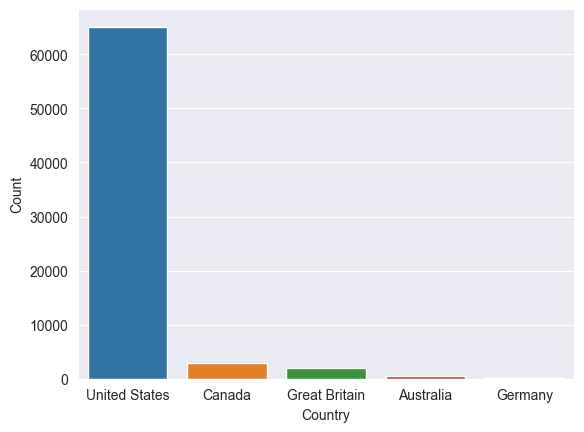

In [123]:
sns.barplot(x="Country", y="count", hue="Country", data=df_count)
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [124]:
# As we can see, there are way more UFO sightings in the US compared to any other country in the dataset.

1.1 Is there an area/region with more sights than others?

In [125]:
df_by_city_US = df.query("Country == 'United States'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_US

,Country,City,Count
8493,United States,Seattle,524
7368,United States,Phoenix,454
6539,United States,New york city,399
7609,United States,Portland,373
5103,United States,Las vegas,367
...,...,...,...
10548,United States,York county,1
10549,United States,York springs,1
3547,United States,Glen house,1
5477,United States,Luverne,1


In [126]:
df_by_city_US["City"].nunique()

10588

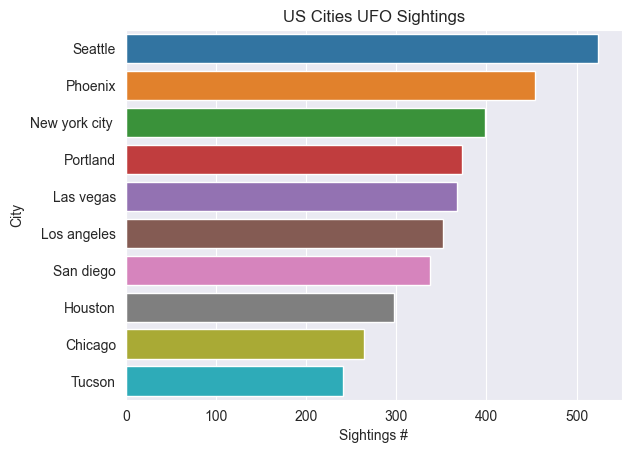

In [127]:
df_by_city_US_sorted = df_by_city_US.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_US_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("US Cities UFO Sightings")
plt.show()

### As we can see in graph above, there are more sightings in big cities and coastal cities.

In [128]:
df_by_city_CA = df.query("Country == 'Canada'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_CA

,Country,City,Count
527,Canada,Toronto,177
537,Canada,Vancouver,100
366,Canada,Ottawa,88
74,Canada,Calgary,78
543,Canada,Victoria,78
...,...,...,...
519,Canada,Thorold,1
563,Canada,Wheatley,1
565,Canada,White river,1
569,Canada,Whitewood,1


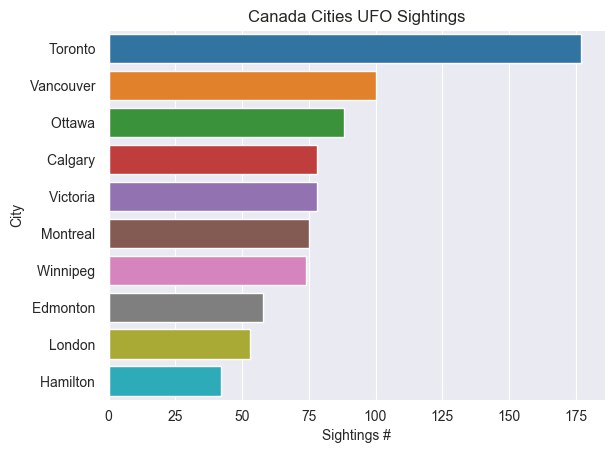

In [129]:
df_by_city_CA_sorted = df_by_city_CA.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_CA_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Canada Cities UFO Sightings")

plt.show()

In [130]:
df_by_city_GB = df.query("Country == 'Great Britain'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_GB

,Country,City,Count
318,Great Britain,London,206
50,Great Britain,Birmingham,62
331,Great Britain,Manchester,60
201,Great Britain,Glasgow,40
379,Great Britain,Nottingham,33
...,...,...,...
34,Great Britain,Barnstaple,1
37,Great Britain,Bathgate,1
38,Great Britain,Beaconsfield,1
40,Great Britain,Bedlington,1


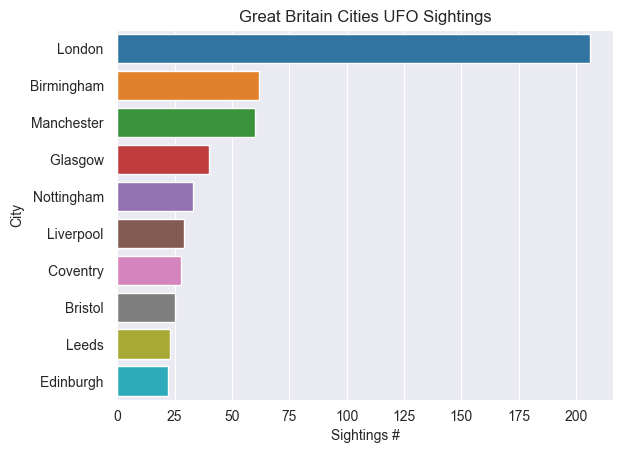

In [131]:
df_by_city_GB_sorted = df_by_city_GB.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_GB_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Great Britain Cities UFO Sightings")
plt.show()

In [132]:
df_by_city_AU = df.query("Country == 'Australia'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_AU

,Country,City,Count
138,Australia,Sydney,81
99,Australia,Melbourne,67
124,Australia,Perth,49
23,Australia,Brisbane,48
0,Australia,Adelaide,24
...,...,...,...
160,Australia,Woy woy,1
161,Australia,Wyong,1
162,Australia,Wyreema,1
163,Australia,Yandoit,1


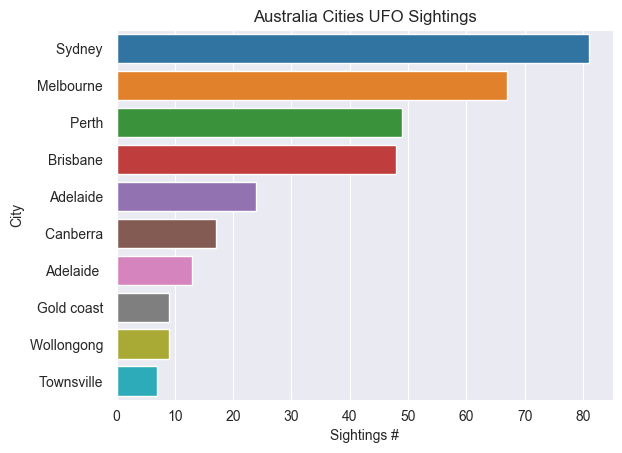

In [133]:
df_by_city_AU_sorted = df_by_city_AU.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_AU_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Australia Cities UFO Sightings")
plt.show()

In [134]:
df_by_city_DE = df.query("Country == 'Germany'").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_by_city_DE

,Country,City,Count
7,Germany,Berlin,11
49,Germany,Munich,5
13,Germany,Bremen,3
1,Germany,Ansbach,3
5,Germany,Baumholder,2
...,...,...,...
74,Germany,Weissenburg,1
75,Germany,Werder,1
76,Germany,Wildflecken,1
77,Germany,Zehdenick,1


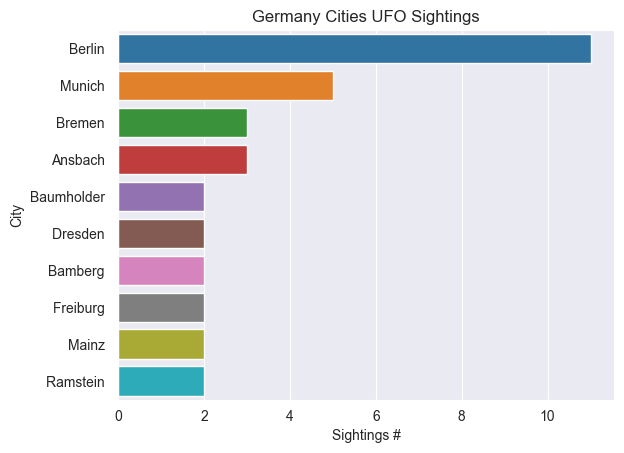

In [135]:
df_by_city_DE_sorted = df_by_city_DE.iloc[0:10].sort_values(by="Count", ascending=False)
sns.barplot(data=df_by_city_DE_sorted, x="Count", y="City", orient="h", hue="City")
plt.xlabel("Sightings #")
plt.title("Germany Cities UFO Sightings")
plt.show()

### Geographic Heatmap

In [221]:
df['Latitude'].apply(type).value_counts()

Latitude
<class 'str'>    80332
Name: count, dtype: int64

In [228]:
df.drop(df.index[df["Latitude"] == "33q.200088"], inplace=True)

In [229]:
df["Latitude"].astype(float)

0        29.883056
1        29.384210
2        53.200000
3        28.978333
4        21.418056
           ...    
80327    36.165833
80328    43.613611
80329    38.297222
80330    38.901111
80331    35.652778
Name: Latitude, Length: 80331, dtype: float64

In [213]:
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)  # Remove rows with missing coordinates

In [230]:
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")  # WGS84 projection

In [235]:
world = gpd.read_file(geodatasets.get_path("naturalearth.land"))

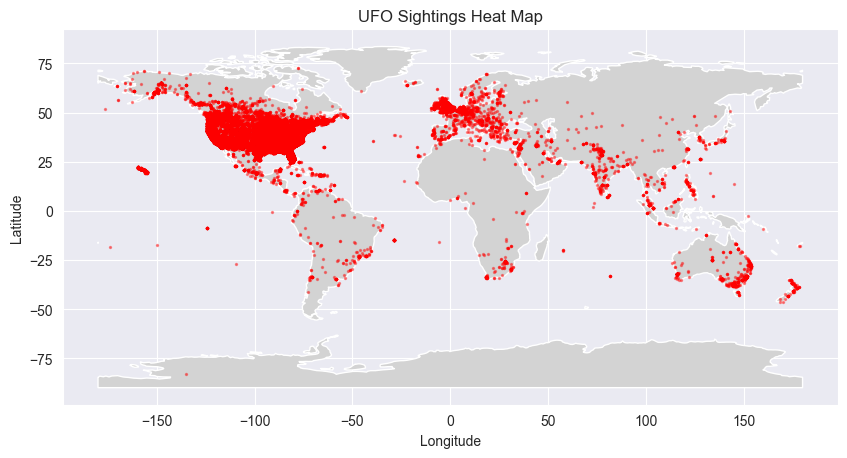

In [236]:
fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightgray')  # Plot base map

# Plot sightings with alpha transparency
gdf.plot(ax=ax, markersize=2, alpha=0.4, color='red')

plt.title("UFO Sightings Heat Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


2. Reports by Year

In [194]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  80332 non-null  object        
 1   State                 74535 non-null  object        
 2   Country               70662 non-null  object        
 3   Shape                 78400 non-null  object        
 4   Duration (seconds)    80332 non-null  object        
 5   Duration (hours/min)  80332 non-null  object        
 6   Comments              80317 non-null  object        
 7   Date_Posted           80332 non-null  datetime64[ns]
 8   Latitude              80332 non-null  object        
 9   longitude             80332 non-null  float64       
 10  Date                  80332 non-null  datetime64[ns]
 11  Time                  80332 non-null  object        
 12  Year                  80332 non-null  int32         
dtypes: datetime64[ns

In [137]:
df["Year"] = df["Date_Posted"].dt.year

In [138]:
df.head()

,City,State,Country,Shape,Duration (seconds),Duration (hours/min),Comments,Date_Posted,Latitude,longitude,Date,Time,Year
0,San marcos,TX,United States,Cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111,1949-10-10,20:30,2004
1,Lackland afb,TX,NaN,Light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,2005-12-16,29.38421,-98.581082,1949-10-10,21:00,2005
2,Chester,NaN,Great Britain,Circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,2008-01-21,53.2,-2.916667,1955-10-10,17:00,2008
3,Edna,TX,United States,Circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833,1956-10-10,21:00,2004
4,Kaneohe,HI,United States,Light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611,1960-10-10,20:00,2004


In [139]:
print(df["Year"].nunique())
df["Year"].value_counts()

17


Year
2012    8090
2013    7562
2009    5936
2011    5616
2005    5288
2004    5224
2008    5121
2007    4875
2003    4792
2010    4446
2006    4399
1999    4286
2002    4230
2001    3496
2000    3042
2014    3039
1998     890
Name: count, dtype: int64

In [140]:
df_year = df["Year"].value_counts().reset_index()

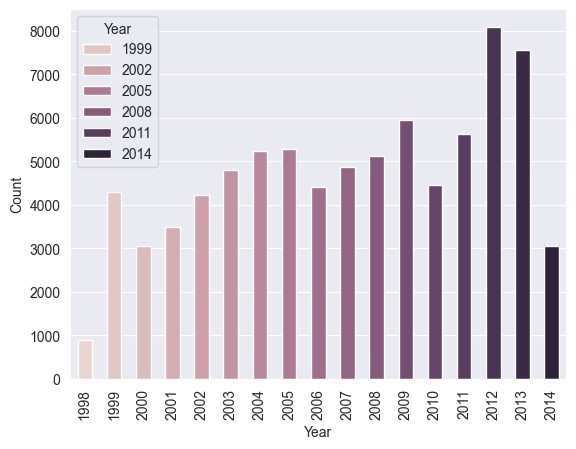

In [237]:
sns.barplot(x="Year", y="count", hue="Year", width=0.5,data=df_year)
plt.xticks(rotation=90)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

### As we can see from the bar graph above, 2012 was the year with most sightings, with over 8000 across the globe.

In [183]:
df_2012 = df.query("Year == 2012").groupby(["Country", "City"]).size().reset_index(name="Count").sort_values(by="Count", ascending=False)
df_2012

,Country,City,Count
2689,United States,Seattle,42
1675,United States,Las vegas,39
2037,United States,Myrtle beach,36
2362,United States,Phoenix,35
2439,United States,Portland,34
...,...,...,...
3291,United States,Yarmouth port,1
45,Canada,Elmira,1
47,Canada,Fredericton,1
49,Canada,Gander,1


3. Any Correlation with shape

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  80332 non-null  object        
 1   State                 74535 non-null  object        
 2   Country               70662 non-null  object        
 3   Shape                 78400 non-null  object        
 4   Duration (seconds)    80332 non-null  object        
 5   Duration (hours/min)  80332 non-null  object        
 6   Comments              80317 non-null  object        
 7   Date_Posted           80332 non-null  datetime64[ns]
 8   Latitude              80332 non-null  object        
 9   longitude             80332 non-null  float64       
 10  Date                  80332 non-null  datetime64[ns]
 11  Time                  80332 non-null  object        
 12  Year                  80332 non-null  int32         
dtypes: datetime64[ns

In [145]:
df["Shape"].nunique()
df_shape = df["Shape"].value_counts().reset_index()

In [146]:
df_shape.fillna(0, inplace=True)

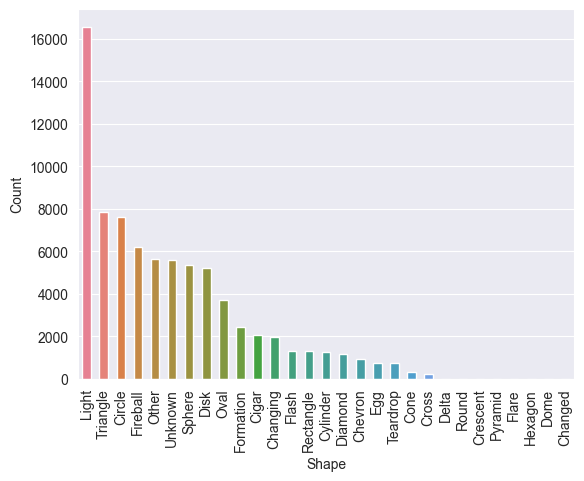

In [147]:
sns.barplot(x="Shape", y="count", hue="Shape", width=0.5,data=df_shape)
plt.xticks(rotation=90)
plt.xlabel("Shape")
plt.ylabel("Count")
plt.show()

### Let's observe the top 10 shapes

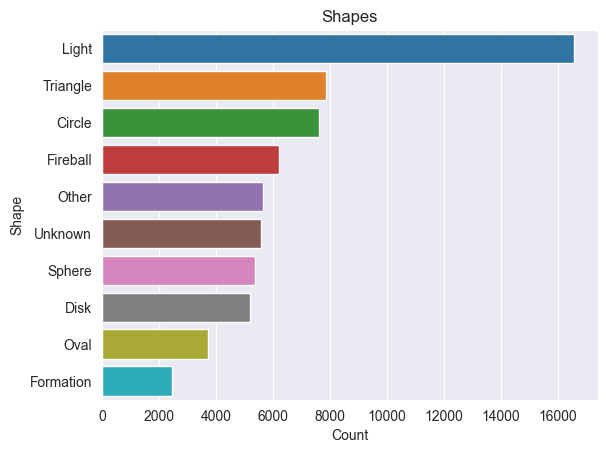

In [148]:
df_shapes_sorted = df_shape.iloc[0:10].sort_values(by="count", ascending=False)
sns.barplot(data=df_shapes_sorted, x="count", y="Shape", orient="h", hue="Shape")
plt.xlabel("Count")
plt.title("Shapes")
plt.show()

### Is there any correlation between the shapes and the location?

Transform the shapes into dummies variables so we can find correlation
- Alternatives:
* One hot encoder or ordinal encoder to change the variables to continuous/discrete
* Cramer's V to keep the variables categorical

In [149]:
df_cor = df[["City", "State", "Country", "Shape"]].copy()
df_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   City     80332 non-null  object
 1   State    74535 non-null  object
 2   Country  70662 non-null  object
 3   Shape    78400 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [150]:
df_cor

,City,State,Country,Shape
0,San marcos,TX,United States,Cylinder
1,Lackland afb,TX,NaN,Light
2,Chester,NaN,Great Britain,Circle
3,Edna,TX,United States,Circle
4,Kaneohe,HI,United States,Light
...,...,...,...,...
80327,Nashville,TN,United States,Light
80328,Boise,ID,United States,Circle
80329,Napa,CA,United States,Other
80330,Vienna,VA,United States,Circle


In [151]:
cont_table1 = pd.crosstab(df_cor["City"], df_cor["Shape"], margins=False)

In [152]:
cont_table2 = pd.crosstab(df_cor["Country"], df_cor["Shape"], margins=False)

In [153]:
import scipy.stats as stats

In [154]:
chi_stat, p_value, dof, expected = stats.chi2_contingency(cont_table1)
chi2_stat, p2_value, dof2, expected2 = stats.chi2_contingency(cont_table2)

In [155]:
# Print results
print(f"Chi-Square Statistic: {chi_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 532053.5796712043
P-value: 2.2576717228552453e-141
Degrees of Freedom: 506184


In [156]:
# Print results
print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p2_value}")
print(f"Degrees of Freedom: {dof2}")

Chi-Square Statistic: 215.56813034336835
P-value: 3.725783935825654e-09
Degrees of Freedom: 108


In [157]:
chi_stat, p_value, dof, expected = stats.chi2_contingency(cont_table1, lambda_="log-likelihood")
print(f"Monte Carlo P-value: {p_value}")

Monte Carlo P-value: 1.0


In [158]:
chi2_stat, p2_value, dof2, expected2 = stats.chi2_contingency(cont_table2, lambda_="log-likelihood")
print(f"Monte Carlo P-value: {p_value}")

Monte Carlo P-value: 1.0


### One Hot Encoder Method

### Get Dummies Method

In [159]:
df_dummies = pd.get_dummies(df["Shape"], dtype="int")

### Cramer's V Method

In [160]:
import numpy as np

n = cont_table1.sum().sum()  # Total observations
min_dim = min(cont_table1.shape) - 1  # Minimum dimension minus one
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

print(f"Cramér's V: {cramers_v}")


Cramér's V: 0.009714000867077948


In [161]:
n = cont_table2.sum().sum()  # Total observations
min_dim = min(cont_table1.shape) - 1  # Minimum dimension minus one
cramers_v = np.sqrt(chi2_stat / (n * min_dim))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.010354484368961572


### Let's standarize the data using Z-score and see how does that change our data

In [162]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [163]:
scaler = MinMaxScaler()

In [164]:
cont_table1

Shape,Changed,Changing,Chevron,Cigar,Circle,Cone,Crescent,Cross,Cylinder,Delta,...,Light,Other,Oval,Pyramid,Rectangle,Round,Sphere,Teardrop,Triangle,Unknown
City,,,,,,,,,,,,,,,,,,,,,
&ccedil;anakkale,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
&iacute;safj&ouml;r&eth;ur,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
&ouml;lmstad,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1-25 corridor,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100 mile,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zuiddorpe,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Zumbrota,0,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Zutphen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [165]:
cols_to_scale = cont_table1.columns[1:]
df_scaled = cont_table1.copy()
df_scaled[cols_to_scale] = scaler.fit_transform(df_scaled[cols_to_scale])

In [166]:
df_scaled

Shape,Changed,Changing,Chevron,Cigar,Circle,Cone,Crescent,Cross,Cylinder,Delta,...,Light,Other,Oval,Pyramid,Rectangle,Round,Sphere,Teardrop,Triangle,Unknown
City,,,,,,,,,,,,,,,,,,,,,
&ccedil;anakkale,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.025641,0.000000
&iacute;safj&ouml;r&eth;ur,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.090909,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
&ouml;lmstad,0,0.0,0.0,0.0000,0.021739,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
1-25 corridor,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
100 mile,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zuiddorpe,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.028571,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
Zumbrota,0,0.0,0.0,0.0625,0.021739,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.023256,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
Zutphen,0,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.026316,0.0,0.000000,0.000000


In [167]:
cont_table2

Shape,Changed,Changing,Chevron,Cigar,Circle,Cone,Crescent,Cross,Cylinder,Delta,...,Light,Other,Oval,Pyramid,Rectangle,Round,Sphere,Teardrop,Triangle,Unknown
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0,9,3,15,62,6,0,1,9,0,...,119,40,30,0,10,0,15,10,43,25
Canada,0,69,36,74,284,10,0,9,53,1,...,655,241,130,0,47,0,205,22,268,207
Germany,0,2,1,3,10,0,0,0,3,0,...,20,9,7,0,1,0,7,0,9,8
Great Britain,0,46,8,60,243,13,0,10,30,0,...,361,133,86,0,29,0,158,38,169,92
United States,1,1584,815,1643,6118,247,1,188,1027,6,...,13473,4466,3032,1,1070,2,4347,592,6549,4567


In [168]:
cols_to_scale2 = cont_table2.columns[1:]
df_scaled2 = cont_table2.copy()
df_scaled2[cols_to_scale2] = scaler.fit_transform(df_scaled2[cols_to_scale2])

In [169]:
df_scaled2

Shape,Changed,Changing,Chevron,Cigar,Circle,Cone,Crescent,Cross,Cylinder,Delta,...,Light,Other,Oval,Pyramid,Rectangle,Round,Sphere,Teardrop,Triangle,Unknown
Country,,,,,,,,,,,,,,,,,,,,,
Australia,0,0.004425,0.002457,0.007317,0.008513,0.024291,0.0,0.005319,0.005859,0.000000,...,0.007359,0.006955,0.007603,0.0,0.008419,0.0,0.001843,0.016892,0.005199,0.003729
Canada,0,0.042351,0.042998,0.043293,0.044859,0.040486,0.0,0.047872,0.048828,0.166667,...,0.047201,0.052053,0.040661,0.0,0.043031,0.0,0.045622,0.037162,0.039602,0.043650
Germany,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
Great Britain,0,0.027813,0.008600,0.034756,0.038147,0.052632,0.0,0.053191,0.026367,0.000000,...,0.025348,0.027821,0.026116,0.0,0.026193,0.0,0.034793,0.064189,0.024465,0.018425
United States,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000


In [170]:
chi3_stat, p3_value, dof3, expected3 = stats.chi2_contingency(df_scaled)

In [171]:
df_scaled2.iloc[:, 1:] += 0.00000000000001  # Add small constant to all numeric columns (except the first column)

In [172]:
chi4_stat, p4_value, dof4, expected4 = stats.chi2_contingency(df_scaled2, correction=True)

In [173]:
# Print results
print(f"Chi-Square Statistic: {chi3_stat}")
print(f"P-value: {p3_value}")
print(f"Degrees of Freedom: {dof3}")

Chi-Square Statistic: 29818.755420529244
P-value: 1.0
Degrees of Freedom: 506184


In [174]:
# Print results
print(f"Chi-Square Statistic: {chi4_stat}")
print(f"P-value: {p4_value}")
print(f"Degrees of Freedom: {dof4}")

Chi-Square Statistic: 1.149792505832697
P-value: 1.0
Degrees of Freedom: 108


### Based on the Chi-Square, I can confirm there is not enough support to confirm that there is a  correlation between city/country with the shape of the UFO.